# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from selenium.webdriver.chrome.options import Options
import numpy as np

In [2]:


driver_path="C:\Program Files\chromedriver-win32"

chrome_options = Options()
chrome_options.add_argument(f"webdriver.chrome.driver={driver_path}")

browser = Browser('chrome', options=chrome_options)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Get the HTML content of the page
html = browser.html

# Create a Beautiful Soup object
temperature_soup = soup(html, 'html.parser')


In [5]:
# Extract all rows of data

table = temperature_soup.find('table')

# Extract all rows from the table
rows = table.find_all('tr')




### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list 
temperature_data_list = []

# Loop through the scraped data to create a list of rows
for row in rows[1:]:  # Skip the header row (index 0)
    # Extract data from each column
    columns = row.find_all('td')
    
    # Create a dictionary to store the data for this row
    row_data = {
        'id': int(columns[0].get_text()),
        'terrestrial_date': columns[1].get_text(),
        'sol': int(columns[2].get_text()),
        'ls': float(columns[3].get_text()),
        'month': int(columns[4].get_text()),
        'min_temp': float(columns[5].get_text()),
        'pressure': float(columns[6].get_text())
    }
    
    # Append the dictionary to the list
    temperature_data_list.append(row_data)

# Display the first few rows of the list for verification
print(temperature_data_list[:5])


[{'id': 2, 'terrestrial_date': '2012-08-16', 'sol': 10, 'ls': 155.0, 'month': 6, 'min_temp': -75.0, 'pressure': 739.0}, {'id': 13, 'terrestrial_date': '2012-08-17', 'sol': 11, 'ls': 156.0, 'month': 6, 'min_temp': -76.0, 'pressure': 740.0}, {'id': 24, 'terrestrial_date': '2012-08-18', 'sol': 12, 'ls': 156.0, 'month': 6, 'min_temp': -76.0, 'pressure': 741.0}, {'id': 35, 'terrestrial_date': '2012-08-19', 'sol': 13, 'ls': 157.0, 'month': 6, 'min_temp': -74.0, 'pressure': 732.0}, {'id': 46, 'terrestrial_date': '2012-08-20', 'sol': 14, 'ls': 157.0, 'month': 6, 'min_temp': -74.0, 'pressure': 740.0}]


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# List of column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create a Pandas DataFrame
temperature_df = pd.DataFrame(temperature_data_list, columns=column_names)


In [8]:
# Confirm DataFrame was created successfully

display(temperature_df.head())


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155.0,6,-75.0,739.0
1,13,2012-08-17,11,156.0,6,-76.0,740.0
2,24,2012-08-18,12,156.0,6,-76.0,741.0
3,35,2012-08-19,13,157.0,6,-74.0,732.0
4,46,2012-08-20,14,157.0,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
data_types = temperature_df.dtypes

# Display the data types
display(data_types)


id                    int64
terrestrial_date     object
sol                   int64
ls                  float64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [10]:
# Check unique values in the 'id' column
print("Unique values in 'id' column:", temperature_df['id'].unique())

# Check unique values in the 'sol' column
print("Unique values in 'sol' column:", temperature_df['sol'].unique())

# Check unique values in the 'month' column
print("Unique values in 'month' column:", temperature_df['month'].unique())


Unique values in 'id' column: [   2   13   24 ... 1894 1893 1895]
Unique values in 'sol' column: [  10   11   12 ... 1975 1976 1977]
Unique values in 'month' column: [ 6  7  8  9 10 11 12  1  2  3  4  5]


In [11]:
temperature_df['terrestrial_date'] = pd.to_datetime(temperature_df['terrestrial_date'])
temperature_df['id'] = temperature_df['id'].astype(str)
temperature_df['sol'] = temperature_df['sol'].astype(int)
temperature_df['ls'] = temperature_df['ls'].astype(int)
temperature_df['month'] = temperature_df['month'].astype(int)


In [12]:
# Confirm type changes were successful by examining data types again
display(temperature_df.dtypes)



id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
months_count = temperature_df['month'].value_counts().sort_index()
print(months_count)


month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [14]:
# 2. How many Martian days' worth of data are there?
martian_days_count = temperature_df['sol'].nunique()
print(martian_days_count)


1867


In [15]:
# 3. What is the average low temperature by month?
average_low_by_month = temperature_df.groupby('month')['min_temp'].mean()
print(average_low_by_month)


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


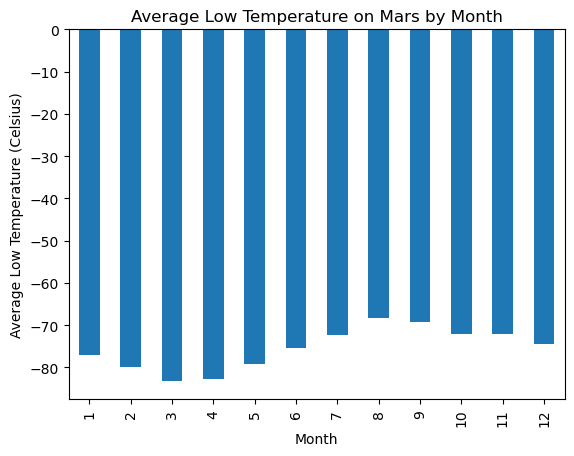

In [16]:
# Plot the average temperature by month
average_low_by_month.plot(kind='bar', xlabel='Month', ylabel='Average Low Temperature (Celsius)', title='Average Low Temperature on Mars by Month')
plt.show()


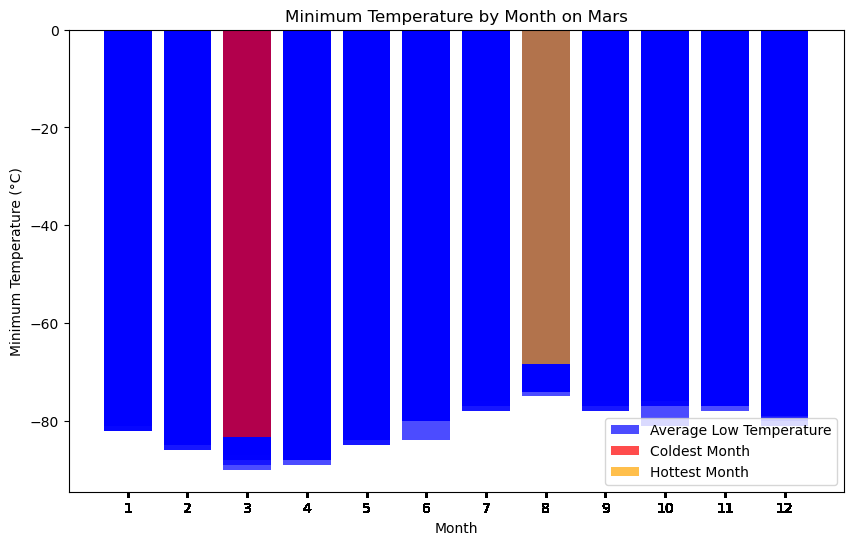

In [17]:
# Identify the coldest and hottest months in Curiosity's location


coldest_month = temperature_df.groupby('month')['min_temp'].mean().idxmin()
hottest_month = temperature_df.groupby('month')['min_temp'].mean().idxmax()

# Sort the DataFrame by 'min_temp' for clarity in the plot
sorted_temperature_df = temperature_df.sort_values(by='min_temp')

# Plot all months with coldest and hottest highlighted
plt.figure(figsize=(10, 6))
plt.bar(sorted_temperature_df['month'], sorted_temperature_df['min_temp'], color='blue', alpha=0.7, label='Average Low Temperature')
plt.bar(coldest_month, sorted_temperature_df.loc[temperature_df['month'] == coldest_month, 'min_temp'].mean(), color='red', alpha=0.7, label='Coldest Month')
plt.bar(hottest_month, sorted_temperature_df.loc[temperature_df['month'] == hottest_month, 'min_temp'].mean(), color='orange', alpha=0.7, label='Hottest Month')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Minimum Temperature by Month on Mars')

# Set x-axis ticks to show all months
plt.xticks(sorted_temperature_df['month'])

# Show the plot
plt.legend()
plt.show()


In [18]:
# 4. Average pressure by Martian month
average_pressure_by_month = temperature_df.groupby('month')['pressure'].mean()
display(average_pressure_by_month)


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

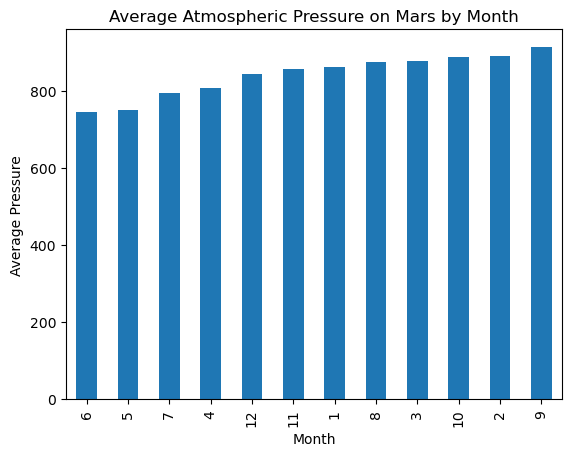

In [19]:
# Sort the average pressure by month in ascending order
sorted_average_pressure = average_pressure_by_month.sort_values()

# Plot the sorted average pressure by month
sorted_average_pressure.plot(kind='bar', xlabel='Month', ylabel='Average Pressure', title='Average Atmospheric Pressure on Mars by Month')
plt.show()


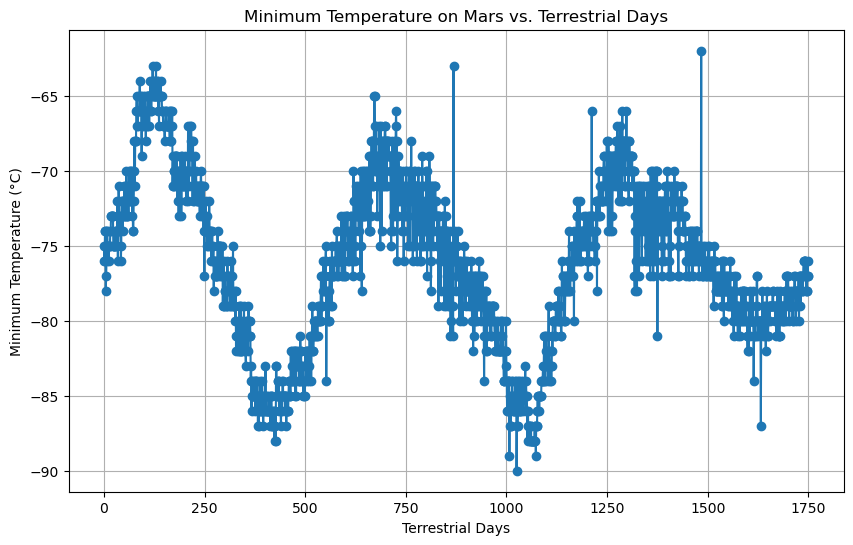

In [20]:
# Convert 'terrestrial_date' to datetime for proper sorting
temperature_df['terrestrial_date'] = pd.to_datetime(temperature_df['terrestrial_date'])

# Sort the DataFrame by 'terrestrial_date' for clarity in the plot
sorted_temperature_df = temperature_df.sort_values(by='terrestrial_date')

# Create an array of linearly spaced terrestrial days
terrestrial_days = np.linspace(0, 1750, len(sorted_temperature_df), endpoint=True)

# Plotting without color
plt.figure(figsize=(10, 6))
plt.plot(terrestrial_days, sorted_temperature_df['min_temp'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Minimum Temperature on Mars vs. Terrestrial Days')

# Show the plot
plt.grid(True)
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV

csv_file_path = r'C:\Users\Qazi Fabia Hoq\OneDrive\Desktop\Module 11\Starter_Code\mars_temperature_data.csv'

sorted_temperature_df.to_csv(csv_file_path, index=False)


In [22]:
browser.quit()